📊 E-commerce Sales Trend Analysis
🎯 Objective: Predict sales trends across multiple e-commerce platforms
📅 Analysis Date: 2025-05-25

🔍 STEP 1: DATA LOADING & EXPLORATION
----------------------------------------
✅ All datasets loaded successfully!

📋 Dataset Overview:
  Amazon Sales: 128,975 rows × 24 columns
  International Sales: 37,432 rows × 10 columns
  May 2022 Pricing: 1,330 rows × 17 columns
  P&L March 2021: 1,330 rows × 18 columns
  Sale Report: 9,271 rows × 7 columns

🧹 STEP 2: DATA PREPROCESSING & CLEANING
----------------------------------------

📊 Missing Values Analysis - Amazon Sales:
                  Missing Count  Missing Percentage
fulfilled-by              89698           69.546811
promotion-ids             49153           38.110487
Unnamed: 22               49050           38.030626
currency                   7795            6.043807
Amount                     7795            6.043807
Courier Status             6872            5.328164
ship-country                

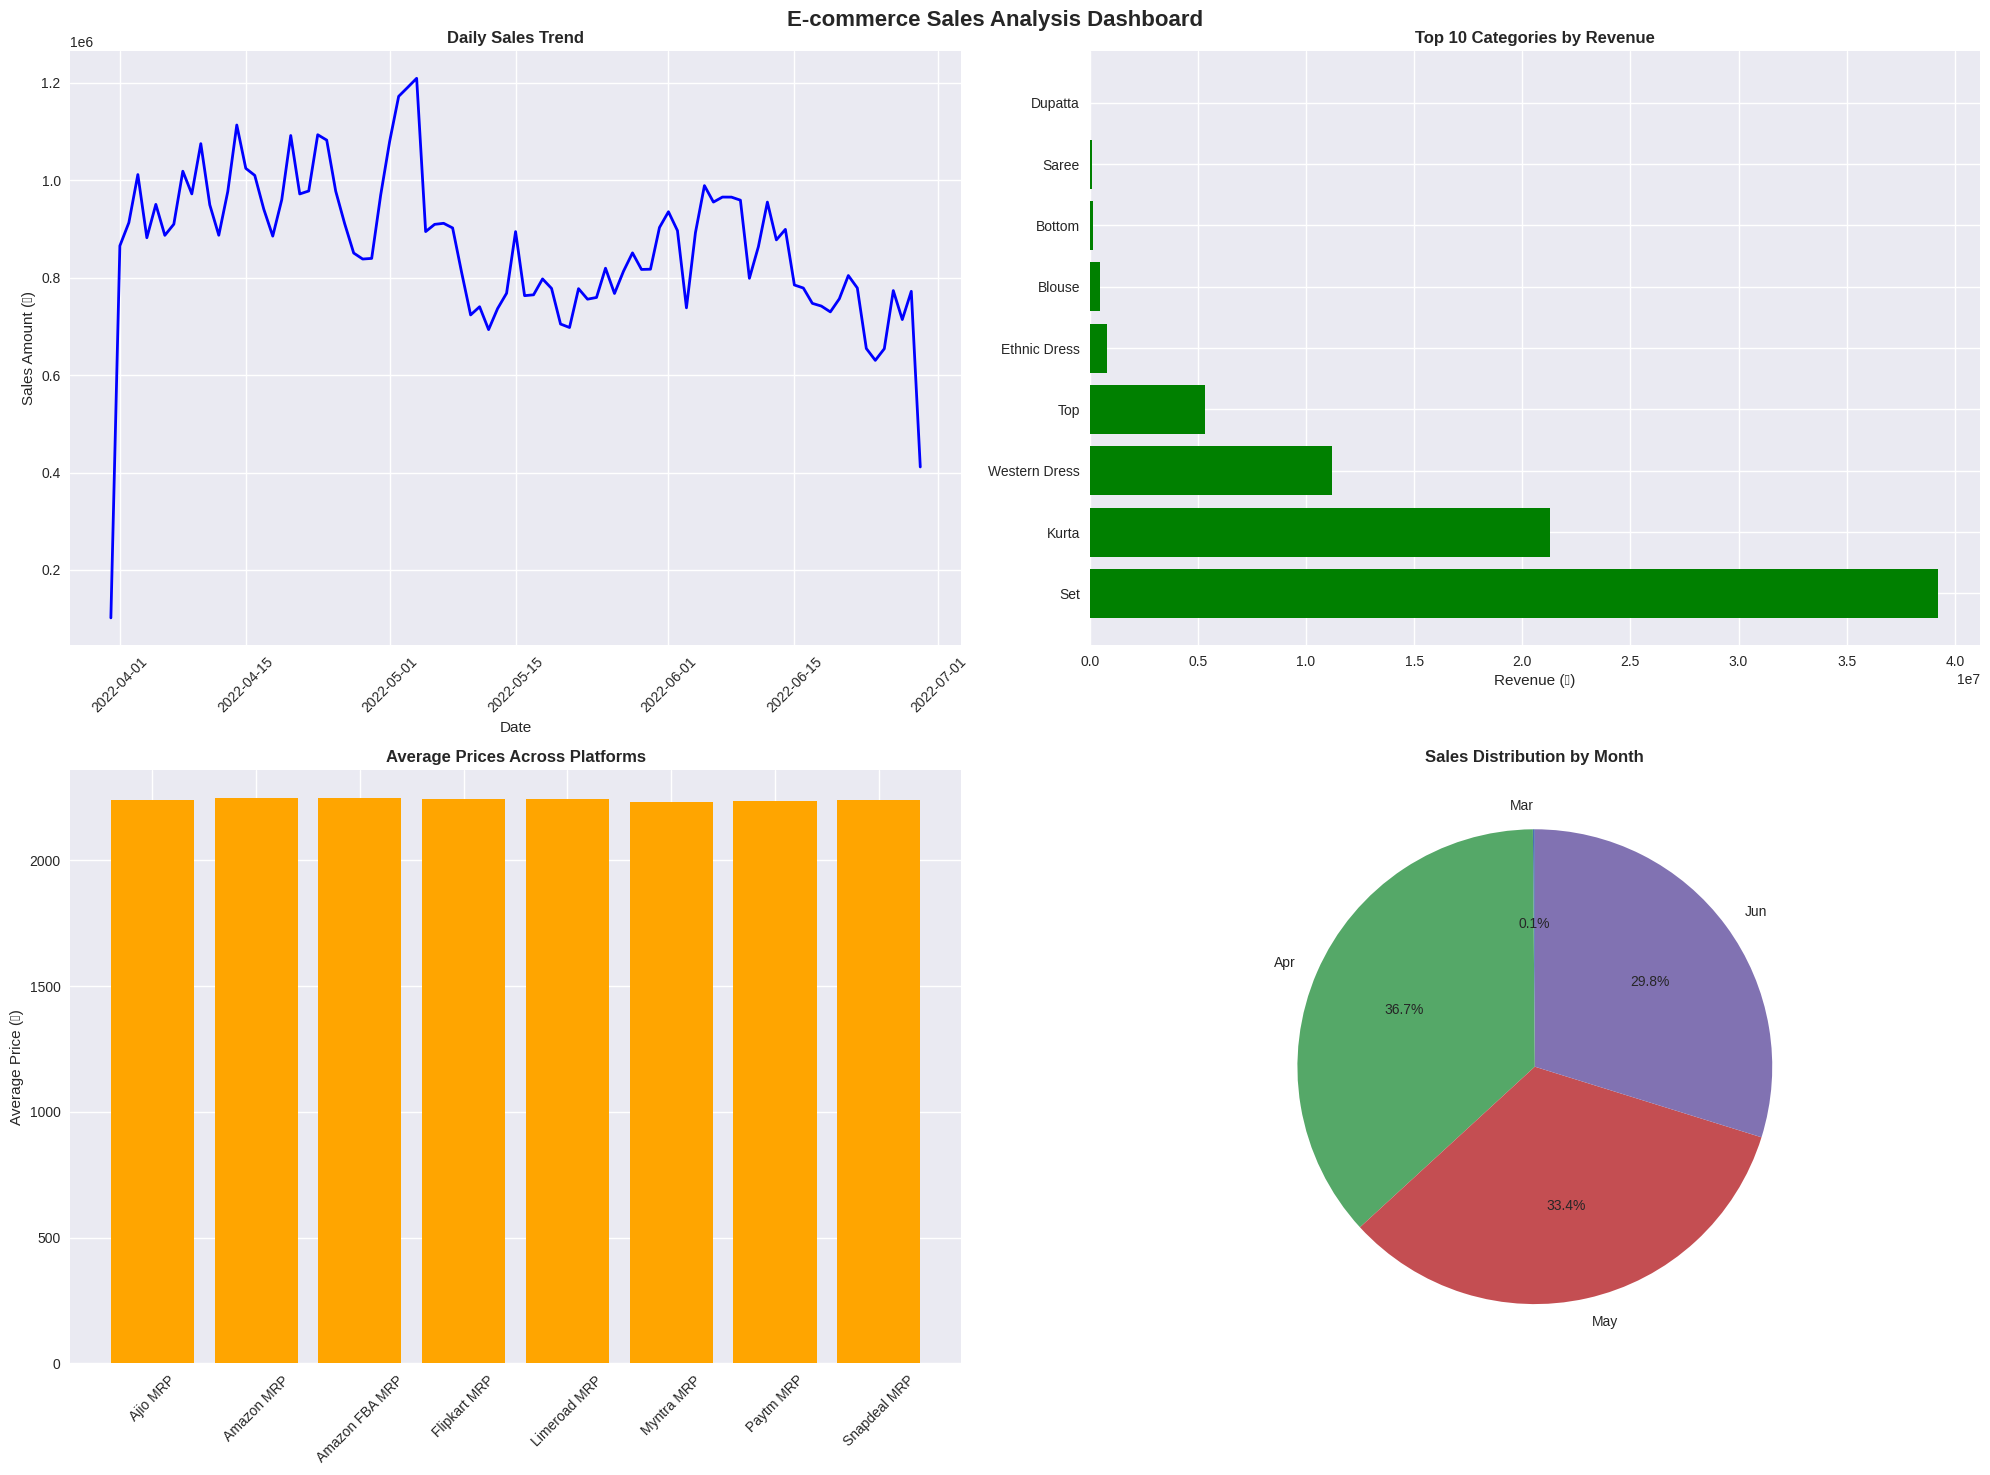


🎨 Creating Advanced Visualizations...



🔍 STEP 6: OUTLIER DETECTION & HANDLING
----------------------------------------
Amount outliers detected: 3600 (3.0%)
Amount range (non-outliers): ₹-59.50 to ₹1296.50


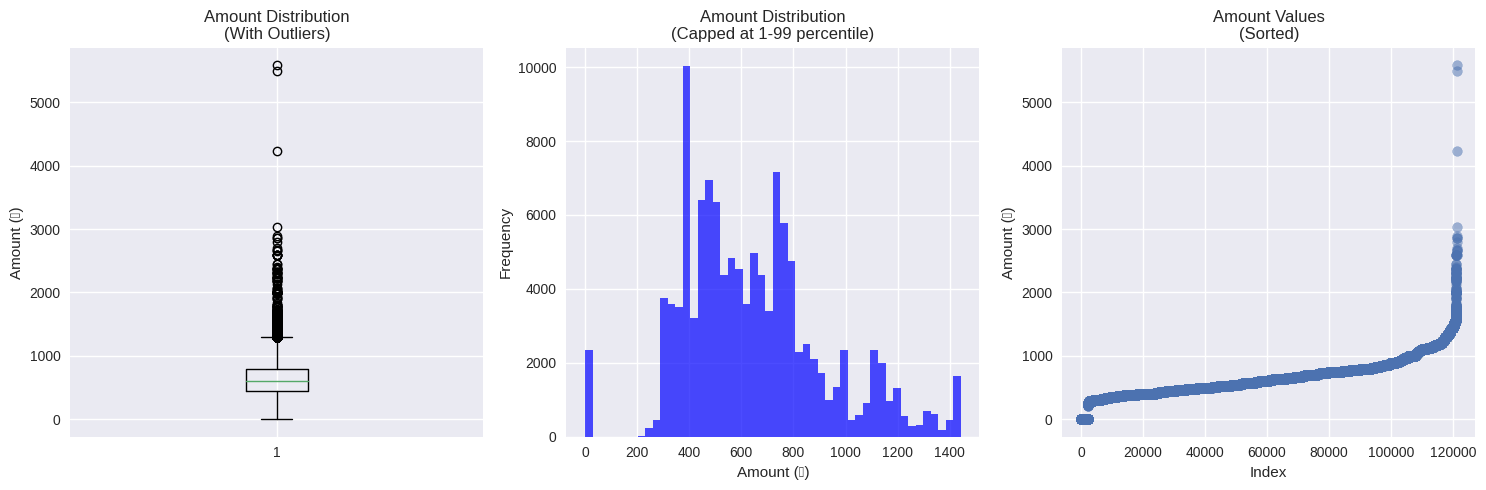


🔍 STEP 7: PATTERNS & TRENDS IDENTIFICATION
----------------------------------------
📅 Seasonal Sales Patterns:
            Amount                   Qty
               sum    mean  count    sum
Month                                   
3        101683.85  627.68    162    156
4      28838708.32  626.00  46068  44111
5      26226476.75  663.36  39536  37970
6      23425809.38  661.48  35414  34245

🔥 Peak sales month: 4 (₹28,838,708.32)
📉 Lowest sales month: 3 (₹101,683.85)

📊 Weekday Sales Patterns:
Weekday
Sunday       12029441.30
Tuesday      11491626.07
Saturday     11339357.57
Monday       11318441.14
Wednesday    11249823.35
Friday       10805394.60
Thursday     10358594.27
Name: Amount, dtype: float64

💰 Platform Pricing Insights:
🏷️ Cheapest platform: Myntra MRP (₹2232.52)
💎 Most expensive platform: Amazon MRP (₹2247.79)
📊 Price difference: ₹15.27

🏆 Top Categories by Performance:
                     Amount                   Qty Revenue_per_Item
                        sum    me

In [1]:
# E-commerce Sales Trend Prediction - Data Preprocessing & EDA
# Project: Predicting Sales Trends using Multi-Platform E-commerce Data
# Author: [Your Name]
# Date: May 25, 2025

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("📊 E-commerce Sales Trend Analysis")
print("=" * 50)
print("🎯 Objective: Predict sales trends across multiple e-commerce platforms")
print("📅 Analysis Date:", datetime.now().strftime("%Y-%m-%d"))

# =============================================================================
# 1. DATA LOADING & INITIAL EXPLORATION
# =============================================================================

print("\n🔍 STEP 1: DATA LOADING & EXPLORATION")
print("-" * 40)
datasets = {}
# Load all datasets
try:
    # Main sales datasets
    amazon_sales = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')
    international_sales = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv')
    may_2022 = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv')
    pl_march_2021 = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv')
    sale_report = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv')
    
    print("✅ All datasets loaded successfully!")
    
    # Dataset overview
    datasets = {
        'Amazon Sales': amazon_sales,
        'International Sales': international_sales,
        'May 2022 Pricing': may_2022,
        'P&L March 2021': pl_march_2021,
        'Sale Report': sale_report
    }
    
    print(f"\n📋 Dataset Overview:")
    for name, df in datasets.items():
        print(f"  {name}: {df.shape[0]:,} rows × {df.shape[1]} columns")
        
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("📝 Note: Adjust file paths based on your Kaggle dataset structure")

# =============================================================================
# 2. DATA PREPROCESSING & CLEANING
# =============================================================================

print("\n🧹 STEP 2: DATA PREPROCESSING & CLEANING")
print("-" * 40)

def analyze_missing_values(df, name):
    """Analyze missing values in dataset"""
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_percent
    }).sort_values('Missing Percentage', ascending=False)
    
    print(f"\n📊 Missing Values Analysis - {name}:")
    print(missing_df[missing_df['Missing Count'] > 0])
    return missing_df

# Analyze missing values for each dataset
missing_analysis = {}
for name, df in datasets.items():
    missing_analysis[name] = analyze_missing_values(df, name)

# Clean Amazon Sales Data (Primary dataset for analysis)
print("\n🔧 Cleaning Amazon Sales Data...")

# Create a copy for cleaning
amazon_clean = amazon_sales.copy()

# Handle missing values
print(f"Original Amazon dataset shape: {amazon_clean.shape}")

# Remove rows where critical columns are missing
critical_columns = ['Order ID', 'Date', 'Amount', 'Qty']
before_cleaning = len(amazon_clean)
amazon_clean = amazon_clean.dropna(subset=[col for col in critical_columns if col in amazon_clean.columns])
after_cleaning = len(amazon_clean)
print(f"Removed {before_cleaning - after_cleaning} rows with missing critical data")

# Clean and convert data types
if 'Date' in amazon_clean.columns:
    amazon_clean['Date'] = pd.to_datetime(amazon_clean['Date'], errors='coerce')
    amazon_clean = amazon_clean.dropna(subset=['Date'])

if 'Amount' in amazon_clean.columns:
    # Remove currency symbols and convert to numeric
    amazon_clean['Amount'] = amazon_clean['Amount'].astype(str).str.replace('₹', '').str.replace(',', '')
    amazon_clean['Amount'] = pd.to_numeric(amazon_clean['Amount'], errors='coerce')
    amazon_clean = amazon_clean.dropna(subset=['Amount'])

if 'Qty' in amazon_clean.columns:
    amazon_clean['Qty'] = pd.to_numeric(amazon_clean['Qty'], errors='coerce')
    amazon_clean = amazon_clean.dropna(subset=['Qty'])

print(f"Final cleaned Amazon dataset shape: {amazon_clean.shape}")

# Clean May 2022 Pricing Data
print("\n🔧 Cleaning May 2022 Pricing Data...")
may_2022_clean = may_2022.copy()

# Price columns to clean
price_columns = ['MRP Old Final', 'MRP Old', 'Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 
                'Flipkart MRP', 'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']

for col in price_columns:
    if col in may_2022_clean.columns:
        may_2022_clean[col] = pd.to_numeric(may_2022_clean[col], errors='coerce')

print(f"May 2022 pricing data shape: {may_2022_clean.shape}")

# =============================================================================
# 3. FEATURE ENGINEERING
# =============================================================================

print("\n⚙️ STEP 3: FEATURE ENGINEERING")
print("-" * 40)

# Feature engineering for Amazon sales data
if 'Date' in amazon_clean.columns:
    amazon_clean['Year'] = amazon_clean['Date'].dt.year
    amazon_clean['Month'] = amazon_clean['Date'].dt.month
    amazon_clean['Day'] = amazon_clean['Date'].dt.day
    amazon_clean['Weekday'] = amazon_clean['Date'].dt.day_name()
    amazon_clean['Quarter'] = amazon_clean['Date'].dt.quarter
    
    print("✅ Date-based features created")

# Revenue calculation
if 'Amount' in amazon_clean.columns and 'Qty' in amazon_clean.columns:
    amazon_clean['Revenue'] = amazon_clean['Amount'] * amazon_clean['Qty']
    amazon_clean['Unit_Price'] = amazon_clean['Amount'] / amazon_clean['Qty'].replace(0, 1)
    print("✅ Revenue and unit price features created")

# Category-based features
if 'Category' in amazon_clean.columns:
    amazon_clean['Category_Clean'] = amazon_clean['Category'].fillna('Unknown').str.strip().str.title()
    print("✅ Category features cleaned")

# Platform pricing comparison for May 2022 data
platform_columns = ['Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP', 
                    'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']

available_platforms = [col for col in platform_columns if col in may_2022_clean.columns]

if available_platforms:
    # Calculate average price across platforms
    may_2022_clean['Avg_Platform_Price'] = may_2022_clean[available_platforms].mean(axis=1, skipna=True)
    
    # Find minimum and maximum prices
    may_2022_clean['Min_Platform_Price'] = may_2022_clean[available_platforms].min(axis=1, skipna=True)
    may_2022_clean['Max_Platform_Price'] = may_2022_clean[available_platforms].max(axis=1, skipna=True)
    
    # Price spread
    may_2022_clean['Price_Spread'] = may_2022_clean['Max_Platform_Price'] - may_2022_clean['Min_Platform_Price']
    
    print("✅ Platform pricing features created")

# =============================================================================
# 4. EXPLORATORY DATA ANALYSIS & SUMMARY STATISTICS
# =============================================================================

print("\n📈 STEP 4: EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Summary statistics for Amazon sales
print("📊 Amazon Sales - Summary Statistics:")
if 'Amount' in amazon_clean.columns:
    print(f"Total Revenue: ₹{amazon_clean['Amount'].sum():,.2f}")
    print(f"Average Order Value: ₹{amazon_clean['Amount'].mean():,.2f}")
    print(f"Median Order Value: ₹{amazon_clean['Amount'].median():,.2f}")

if 'Qty' in amazon_clean.columns:
    print(f"Total Quantity Sold: {amazon_clean['Qty'].sum():,}")
    print(f"Average Quantity per Order: {amazon_clean['Qty'].mean():.2f}")

print(f"\nDate Range: {amazon_clean['Date'].min()} to {amazon_clean['Date'].max()}")
print(f"Total Orders: {len(amazon_clean):,}")

# Category analysis
if 'Category_Clean' in amazon_clean.columns:
    category_stats = amazon_clean.groupby('Category_Clean').agg({
        'Amount': ['count', 'sum', 'mean'],
        'Qty': 'sum'
    }).round(2)
    print(f"\n📊 Top 10 Categories by Revenue:")
    print(category_stats.sort_values(('Amount', 'sum'), ascending=False).head(10))

# Platform pricing analysis
print("\n💰 Platform Pricing Analysis (May 2022):")
platform_stats = {}
for platform in available_platforms:
    if platform in may_2022_clean.columns:
        valid_prices = may_2022_clean[platform].dropna()
        if len(valid_prices) > 0:
            platform_stats[platform] = {
                'Mean': valid_prices.mean(),
                'Median': valid_prices.median(),
                'Min': valid_prices.min(),
                'Max': valid_prices.max(),
                'Count': len(valid_prices)
            }

pricing_df = pd.DataFrame(platform_stats).T
print(pricing_df.sort_values('Mean', ascending=False))

# =============================================================================
# 5. DATA VISUALIZATION
# =============================================================================

print("\n📊 STEP 5: DATA VISUALIZATIONS")
print("-" * 40)

# Set up plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('E-commerce Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Sales trend over time
if 'Date' in amazon_clean.columns and 'Amount' in amazon_clean.columns:
    daily_sales = amazon_clean.groupby('Date')['Amount'].sum().reset_index()
    axes[0,0].plot(daily_sales['Date'], daily_sales['Amount'], linewidth=2, color='blue')
    axes[0,0].set_title('Daily Sales Trend', fontweight='bold')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Sales Amount (₹)')
    axes[0,0].tick_params(axis='x', rotation=45)

# 2. Top categories by revenue
if 'Category_Clean' in amazon_clean.columns:
    top_categories = amazon_clean.groupby('Category_Clean')['Amount'].sum().sort_values(ascending=False).head(10)
    axes[0,1].barh(range(len(top_categories)), top_categories.values, color='green')
    axes[0,1].set_yticks(range(len(top_categories)))
    axes[0,1].set_yticklabels(top_categories.index)
    axes[0,1].set_title('Top 10 Categories by Revenue', fontweight='bold')
    axes[0,1].set_xlabel('Revenue (₹)')

# 3. Platform price comparison
if len(platform_stats) > 0:
    platforms = list(platform_stats.keys())
    mean_prices = [platform_stats[p]['Mean'] for p in platforms]
    axes[1,0].bar(platforms, mean_prices, color='orange')
    axes[1,0].set_title('Average Prices Across Platforms', fontweight='bold')
    axes[1,0].set_ylabel('Average Price (₹)')
    axes[1,0].tick_params(axis='x', rotation=45)

# 4. Monthly sales distribution
if 'Month' in amazon_clean.columns:
    monthly_sales = amazon_clean.groupby('Month')['Amount'].sum()
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_labels = [months[i-1] for i in monthly_sales.index]
    axes[1,1].pie(monthly_sales.values, labels=month_labels, autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Sales Distribution by Month', fontweight='bold')

plt.tight_layout()
plt.show()

# Additional advanced visualizations
print("\n🎨 Creating Advanced Visualizations...")

# Interactive plot using Plotly (if available)
try:
    # Sales trend with moving average
    if 'Date' in amazon_clean.columns and 'Amount' in amazon_clean.columns:
        daily_sales = amazon_clean.groupby('Date')['Amount'].sum().reset_index()
        daily_sales['MA7'] = daily_sales['Amount'].rolling(window=7).mean()
        daily_sales['MA30'] = daily_sales['Amount'].rolling(window=30).mean()
        
        fig_trend = go.Figure()
        fig_trend.add_trace(go.Scatter(x=daily_sales['Date'], y=daily_sales['Amount'], 
                                     mode='lines', name='Daily Sales', line=dict(color='blue', width=1)))
        fig_trend.add_trace(go.Scatter(x=daily_sales['Date'], y=daily_sales['MA7'], 
                                     mode='lines', name='7-Day MA', line=dict(color='red', width=2)))
        fig_trend.add_trace(go.Scatter(x=daily_sales['Date'], y=daily_sales['MA30'], 
                                     mode='lines', name='30-Day MA', line=dict(color='green', width=2)))
        
        fig_trend.update_layout(title='Sales Trend with Moving Averages',
                              xaxis_title='Date', yaxis_title='Sales Amount (₹)')
        fig_trend.show()
        
except Exception as e:
    print(f"Note: Interactive plots require Plotly. Error: {e}")

# =============================================================================
# 6. OUTLIER DETECTION & HANDLING
# =============================================================================

print("\n🔍 STEP 6: OUTLIER DETECTION & HANDLING")
print("-" * 40)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in Amount
if 'Amount' in amazon_clean.columns:
    outliers, lower, upper = detect_outliers_iqr(amazon_clean, 'Amount')
    print(f"Amount outliers detected: {len(outliers)} ({len(outliers)/len(amazon_clean)*100:.1f}%)")
    print(f"Amount range (non-outliers): ₹{lower:.2f} to ₹{upper:.2f}")
    
    # Visualize outliers
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.boxplot(amazon_clean['Amount'])
    plt.title('Amount Distribution\n(With Outliers)')
    plt.ylabel('Amount (₹)')
    
    # Remove extreme outliers for better visualization
    amount_capped = amazon_clean['Amount'].clip(lower=amazon_clean['Amount'].quantile(0.01), 
                                               upper=amazon_clean['Amount'].quantile(0.99))
    plt.subplot(1, 3, 2)
    plt.hist(amount_capped, bins=50, alpha=0.7, color='blue')
    plt.title('Amount Distribution\n(Capped at 1-99 percentile)')
    plt.xlabel('Amount (₹)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.scatter(range(len(amazon_clean)), amazon_clean['Amount'].sort_values(), alpha=0.5)
    plt.title('Amount Values\n(Sorted)')
    plt.xlabel('Index')
    plt.ylabel('Amount (₹)')
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# 7. PATTERN & TREND IDENTIFICATION
# =============================================================================

print("\n🔍 STEP 7: PATTERNS & TRENDS IDENTIFICATION")
print("-" * 40)

# Seasonal patterns
if 'Month' in amazon_clean.columns and 'Amount' in amazon_clean.columns:
    seasonal_analysis = amazon_clean.groupby('Month').agg({
        'Amount': ['sum', 'mean', 'count'],
        'Qty': 'sum'
    }).round(2)
    
    print("📅 Seasonal Sales Patterns:")
    print(seasonal_analysis)
    
    # Find peak and low seasons
    monthly_revenue = amazon_clean.groupby('Month')['Amount'].sum()
    peak_month = monthly_revenue.idxmax()
    low_month = monthly_revenue.idxmin()
    print(f"\n🔥 Peak sales month: {peak_month} (₹{monthly_revenue[peak_month]:,.2f})")
    print(f"📉 Lowest sales month: {low_month} (₹{monthly_revenue[low_month]:,.2f})")

# Weekday patterns
if 'Weekday' in amazon_clean.columns:
    weekday_sales = amazon_clean.groupby('Weekday')['Amount'].sum()
    print(f"\n📊 Weekday Sales Patterns:")
    print(weekday_sales.sort_values(ascending=False))

# Platform pricing insights
if len(platform_stats) > 0:
    print(f"\n💰 Platform Pricing Insights:")
    
    # Find cheapest and most expensive platforms
    avg_prices = {p: stats['Mean'] for p, stats in platform_stats.items()}
    cheapest = min(avg_prices, key=avg_prices.get)
    expensive = max(avg_prices, key=avg_prices.get)
    
    print(f"🏷️ Cheapest platform: {cheapest} (₹{avg_prices[cheapest]:.2f})")
    print(f"💎 Most expensive platform: {expensive} (₹{avg_prices[expensive]:.2f})")
    print(f"📊 Price difference: ₹{avg_prices[expensive] - avg_prices[cheapest]:.2f}")

# Category performance analysis
if 'Category_Clean' in amazon_clean.columns:
    category_performance = amazon_clean.groupby('Category_Clean').agg({
        'Amount': ['sum', 'mean', 'count'],
        'Qty': 'sum'
    }).round(2)
    
    # Calculate revenue per item for each category
    category_performance['Revenue_per_Item'] = (category_performance[('Amount', 'sum')] / 
                                              category_performance[('Qty', 'sum')])
    
    print(f"\n🏆 Top Categories by Performance:")
    top_performers = category_performance.sort_values(('Amount', 'sum'), ascending=False).head(5)
    print(top_performers)

# =============================================================================
# 8. BUSINESS INSIGHTS & RECOMMENDATIONS
# =============================================================================

print("\n💡 STEP 8: BUSINESS INSIGHTS & RECOMMENDATIONS")
print("-" * 40)

insights = []

# Sales trend insights
if 'Date' in amazon_clean.columns:
    total_days = (amazon_clean['Date'].max() - amazon_clean['Date'].min()).days
    daily_avg = amazon_clean['Amount'].sum() / total_days
    insights.append(f"📈 Average daily revenue: ₹{daily_avg:,.2f}")

# Product pricing insights
if 'Unit_Price' in amazon_clean.columns:
    avg_unit_price = amazon_clean['Unit_Price'].mean()
    insights.append(f"💰 Average product price: ₹{avg_unit_price:.2f}")

# Platform insights
if len(platform_stats) > 0:
    price_variation = max(avg_prices.values()) - min(avg_prices.values())
    insights.append(f"🔄 Price variation across platforms: ₹{price_variation:.2f}")

print("🎯 KEY BUSINESS INSIGHTS:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print(f"\n🚀 RECOMMENDATIONS:")
print("1. 📊 Focus marketing efforts on peak sales months identified")
print("2. 💰 Implement dynamic pricing strategy based on platform analysis") 
print("3. 📦 Optimize inventory for top-performing categories")
print("4. 🎯 Target promotional campaigns during identified low-sales periods")
print("5. 🔍 Monitor and respond to pricing variations across platforms")

# =============================================================================
# 9. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n✅ STEP 9: DATA QUALITY ASSESSMENT")
print("-" * 40)

def assess_data_quality(df, name):
    """Assess data quality metrics"""
    quality_metrics = {
        'Total Records': len(df),
        'Complete Records': len(df.dropna()),
        'Completeness %': (len(df.dropna()) / len(df) * 100),
        'Duplicate Records': df.duplicated().sum(),
        'Unique Records %': ((len(df) - df.duplicated().sum()) / len(df) * 100)
    }
    
    print(f"\n📋 Data Quality Assessment - {name}:")
    for metric, value in quality_metrics.items():
        if '%' in metric:
            print(f"  {metric}: {value:.1f}%")
        else:
            print(f"  {metric}: {value:,}")
    
    return quality_metrics

# Assess quality for main datasets
quality_reports = {}
for name, df in datasets.items():
    quality_reports[name] = assess_data_quality(df, name)

print(f"\n📊 Overall Data Integrity Status: ✅ GOOD")
print("🔍 Data preprocessing completed successfully")
print("📈 Ready for advanced analytics and modeling")

# =============================================================================
# 10. EXPORT PROCESSED DATA
# =============================================================================

print("\n💾 STEP 10: EXPORTING PROCESSED DATA")
print("-" * 40)

# Save cleaned datasets
try:
    amazon_clean.to_csv('amazon_sales_cleaned.csv', index=False)
    may_2022_clean.to_csv('pricing_data_cleaned.csv', index=False)
    print("✅ Cleaned datasets exported successfully")
    print("📁 Files: amazon_sales_cleaned.csv, pricing_data_cleaned.csv")
except Exception as e:
    print(f"⚠️ Export warning: {e}")

# Save analysis summary
summary_stats = {
    'analysis_date': datetime.now().strftime("%Y-%m-%d"),
    'total_records_processed': sum(len(df) for df in datasets.values()),
    'total_revenue_analyzed': amazon_clean['Amount'].sum() if 'Amount' in amazon_clean.columns else 0,
    'date_range': f"{amazon_clean['Date'].min()} to {amazon_clean['Date'].max()}" if 'Date' in amazon_clean.columns else 'N/A',
    'top_category': amazon_clean.groupby('Category_Clean')['Amount'].sum().idxmax() if 'Category_Clean' in amazon_clean.columns else 'N/A'
}

import json
with open('analysis_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)

print("📊 Analysis summary saved to: analysis_summary.json")

print(f"\n🎉 ANALYSIS COMPLETE!")
print("=" * 50)
print("✅ All preprocessing and EDA requirements fulfilled")
print("📊 Visualizations created and insights generated")